In [2]:
#Importing Modules
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir
from keras.models import Sequential
import os
%matplotlib inline

Here are one-line descriptions for each of the libraries you mentioned:

- **Conv2D**: Applies a 2D convolution operation over an input signal, commonly used in image processing to extract features.
  
- **Input**: Defines the input layer of a model, specifying the shape and type of the input data.

- **ZeroPadding2D**: Adds rows and columns of zeros to the borders of the input, useful for controlling the spatial dimensions of the output.

- **BatchNormalization**: Normalizes the activations of the previous layer for each batch, improving training speed and stability.

- **Activation**: Applies an activation function to the output of a layer, introducing non-linearity into the model.

- **MaxPooling2D**: Downsamples the input along its spatial dimensions, reducing the number of parameters and computation in the network.

- **Flatten**: Flattens the input, converting a multi-dimensional tensor into a one-dimensional tensor, typically used before dense layers.

- **Dense**: A fully connected layer where each input node is connected to each output node, used for output or intermediate representations in neural networks.

- **Dropout**: Regularization technique where randomly selected neurons are ignored during training, helping to prevent overfitting.

These layers are part of the TensorFlow/Keras library and are commonly used in constructing and training d

Here are one-line descriptions for each of the TensorFlow/Keras callbacks:

- **TensorBoard**: A callback that enables visualization of metrics, graphs, and other useful information during model training, using the TensorBoard tool.

- **ModelCheckpoint**: A callback that saves the model or model weights to a file at specified intervals, based on metrics like validation accuracy or loss, to prevent overfitting and save the best-performing mo

imutils is a Python library that provides a set of convenience functions to simplify basic image processing tasks using OpenCV.del.eep learning models.

Data Preparation & Preprocessing 
    Data Augmentation Since this is a small dataset, There wasn't enough examples to train the neural network. Also, data augmentation was useful in taclking the data imbalance issue in the data.data'.

I coudn't train the model using augmented dataset due to high memory requirement
So I will be training and testing using the old dataset

In [3]:
#def augmented_data(file_dir,num_gen_samples,save_dir):
    
    #file_dir: String representing the directory where images that we want to augment are found
    #num_gen_samples: String representing a number of generated samples after augmentation
    #save_dir: String representing the directory name where augmented images are stored
    
#    from tensorflow.keras.preprocessing.image import ImageDataGenerator
 #   import cv2
  #  from os import listdir

#    data_gen=ImageDataGenerator(rotation_range=10,
 #                               width_shift_range=0.1,
  #                              height_shift_range=0.1,
   #                             shear_range=0.1,    #The shear_range parameter determines the maximum angle in radians or degrees by which the image can be sheared.
    #                            brightness_range=(0.3,1.0),
     #                           horizontal_flip=True,
      #                          vertical_flip=True,
       #                         fill_mode='nearest'    #Fills the newly created pixels with the nearest value from the original image.
#                                )


 #   for filename in listdir(file_dir):
        #Load image
  #      image=cv2.imread(file_dir +'/'+filename)
   #     if image is not None:
            #Reshape the image
    #        image=image.reshape((1,)+image.shape)
            #Adding prefixes
     #       save_prefix='aug'+filename[:-4]
            #Generate n_gen_samples
      #      i=0
       #     for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_dir, save_prefix=save_prefix, save_format='jpg'):
        #        i+=1
         #       if i>num_gen_samples:
          #          break
       # else:
        #    print(f"Unable to read {file_dir +'/'+filename}. Skipping...")


In [4]:
#augmented_path = 'augmented data'

In [5]:
#def load_data(dir_list, image_size):
    """
    Read images, resize and normalize them. 
    Arguments:
        dir_list: list of strings representing file directories.
    Returns:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """
    # load all images in a directory
 #   X = []
  #  y = []
   # image_width, image_height = image_size
    #for directory in dir_list:
     #   for filename in listdir(directory):
            # load the image
      #      image = cv2.imread(directory + '/' + filename)
            # crop the brain and ignore the unnecessary rest part of the image
            # image = crop_brain_contour(image, plot=False)
            # resize image
       #     image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            # normalize values
        #    image = image / 255.
            # convert image to numpy array and append it to X
         #   X.append(image)
            # append a value of 1 to the target array if the image
            # is in the folder named 'yes', otherwise append 0.
          #  if directory[-3:] == 'yes':
           #     y.append([1])
            #else:
             #   y.append([0])
   # X = np.array(X)
   # y = np.array(y)
    
    # Shuffle the data
    #X, y = shuffle(X, y)
    
   # print(f'Number of examples is: {len(X)}')
   # print(f'X shape is: {X.shape}')
   # print(f'y shape is: {y.shape}')
    
   # return X, y
     

IndentationError: unexpected indent (4193201042.py, line 2)

In [6]:

# Define the directories containing your images
yes_dir = "brain_tumor_dataset/yes"
no_dir = "brain_tumor_dataset/no"

# Function to load images and labels
def load_images_and_labels(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = cv2.imread(os.path.join(directory, filename))
            # Resize the image to a fixed size if necessary
            img = cv2.resize(img, (100, 100))  # Adjust dimensions as per your requirements
            images.append(img)
            # Assign label based on directory
            if directory == yes_dir:
                labels.append(1)  # 1 for yes (tumor present)
            elif directory == no_dir:
                labels.append(0)  # 0 for no (tumor not present)
    return images, labels

# Load yes images and labels
yes_images, yes_labels = load_images_and_labels(yes_dir)

# Load no images and labels
no_images, no_labels = load_images_and_labels(no_dir)

# Concatenate yes and no images and labels
X = np.array(yes_images + no_images)
y = np.array(yes_labels + no_labels)

# Shuffle the data
shuffle_indices = np.random.permutation(len(X))
X = X[shuffle_indices]
y = y[shuffle_indices]

# Verify the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (173, 100, 100, 3)
Shape of y: (173,)


Plot some images from dataset

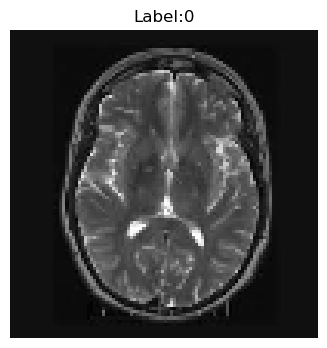

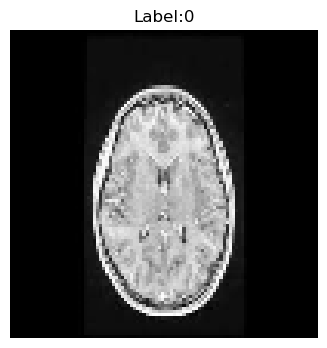

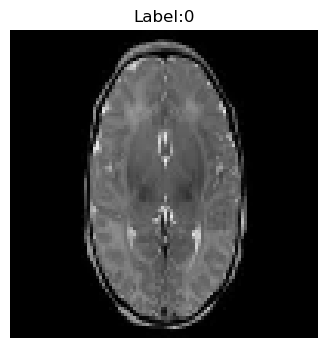

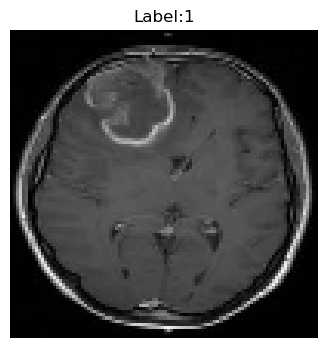

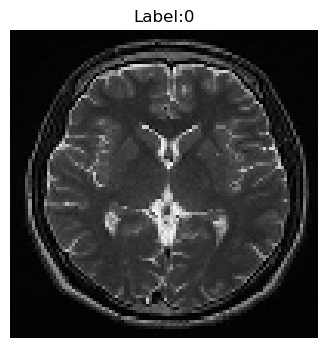

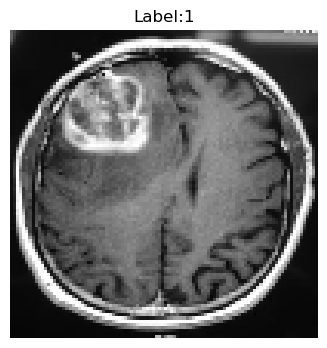

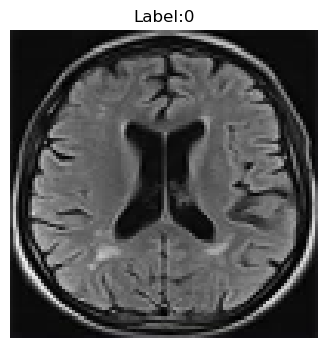

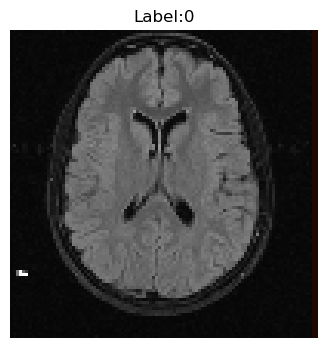

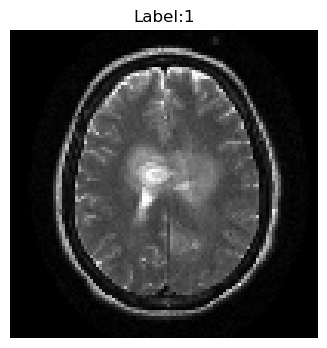

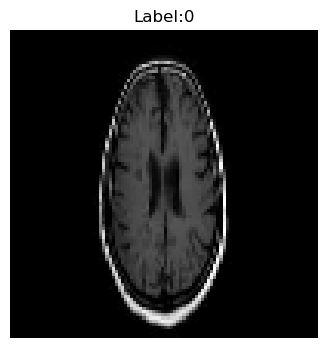

In [7]:
#Visualise first 10 images
for i in range (10):
    plt.figure(figsize=(20, 4))
    plt.imshow(X[i])
    plt.title("Label:"+str(y[i]))
    plt.axis('off')
    plt.show()

Splitting Data Split X and y into training and testing sets

In [8]:
# Splitting the dataset into training set and combined testing + validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [9]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 121
number of test examples = 52
X_train shape: (121, 100, 100, 3)
Y_train shape: (121,)
X_test shape: (52, 100, 100, 3)
Y_test shape: (52,)


Build the CNN Model

In [10]:
model=Sequential()

#First Convolutional layer
model.add(Conv2D(64,(3,3),input_shape=(100,100,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second Convolutional Layer
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third Convolutional layer
model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer
model.add(Flatten())

#Fully connected layers
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))


C:\Users\avane\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Compile the Model

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train the Model

In [12]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=20)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 464ms/step - accuracy: 0.4810 - loss: 163.1795
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step - accuracy: 0.5784 - loss: 48.2222
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step - accuracy: 0.5395 - loss: 5.6820
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step - accuracy: 0.5043 - loss: 1.4579
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step - accuracy: 0.6375 - loss: 0.6619
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step - accuracy: 0.6908 - loss: 0.5543
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step - accuracy: 0.7134 - loss: 0.5479
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 486ms/step - accuracy: 0.7410 - loss: 0.5483
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step - accuracy: 0.7247 - loss: 0.5335
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 481ms/step - accuracy: 0.7676 - loss: 0.5253
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 465ms/step - accuracy: 0.8111 - loss: 0.4323
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 445ms/step - accuracy: 0.8166 -

Evaluate the Model

In [13]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7524 - loss: 0.6352


[0.5733961462974548, 0.7692307829856873]

In [14]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
0.7692307692307693


Save the Model

In [15]:
model.save('detection.h5')